In [ ]:
import numpy as np, matplotlib.pyplot as plt, itertools
from tqdm.notebook import tqdm as log_progress

In [2]:
L, q = 6, 4
N = L * L
q ** N

4722366482869645213696

Фиксируем GS как нулевой. Относительно него,  для каждого из небольшого списка количества перевернутых спинов, считаем энергии. 

In [3]:
def calc_energy(state, N, L):
    E = 0
    for j in range(N):
        column = j % L
        row = j // L
        down = (j + L) % N
        E -= (state[j] == state[down])
        if (row + column) % 2 == 0:
            right = (j + 1) % L + L * row
            E -= (state[j] == state[right])

    return E

In [4]:
d = {}

GS

In [5]:
state = [0 for _ in range(N)]
d[0] = {calc_energy(state, N, L): 1}

One Pin

In [6]:
k = 1
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    state = [0 for _ in range(N)]
    state[k1] = color1
    E = calc_energy(state, N, L)
    try:
        d[k][E] += 1
    except: 
        d[k][E] = 1
d[k]

{-51: 108}

In [7]:
N * (q - 1)

108

Two Pins

In [8]:
k = 2
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1, 2, 3]):
        state = [0 for _ in range(N)]
        state[k1] = color1
        state[k2] = color2

        E = calc_energy(state, N, L)
        try:
            d[k][E] += 1
        except: 
            d[k][E] = 1
d[k]

{-50: 162, -49: 324, -48: 5184}

Third Pins

In [66]:
k = 3
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1, 2, 3]):
        for k3, color3 in itertools.product(range(k2 + 1, N), [1, 2, 3]):
            state = [0 for _ in range(N)]
            state[k1] = color1
            state[k2] = color2
            state[k3] = color3

            E = calc_energy(state, N, L)
            try:
                d[k][E] += 1
            except: 
                d[k][E] = 1
d[k]

{-47: 15876, -49: 324, -48: 1296, -46: 29160, -45: 146124}

Four Pins

In [10]:
k = 4
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1, 2, 3]):
        for k3, color3 in itertools.product(range(k2 + 1, N), [1, 2, 3]):
            for k4, color4 in itertools.product(range(k3 + 1, N), [1, 2, 3]):
                state = [0 for _ in range(N)]
                state[k1] = color1
                state[k2] = color2
                state[k3] = color3
                state[k4] = color4

                E = calc_energy(state, N, L)
                try:
                    d[k][E] += 1
                except: 
                    d[k][E] = 1
d[k]

{-46: 46251,
 -45: 154764,
 -44: 723168,
 -48: 756,
 -47: 4536,
 -43: 1148904,
 -42: 2692926}

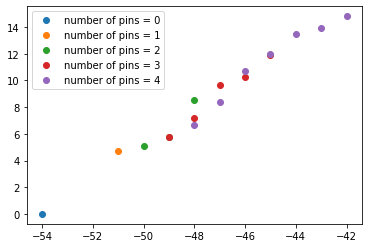

In [11]:
for k in d:
    plt.plot([E for E, G in d[k].items()], [np.log(G) for E, G in d[k].items()], 'o', label = "number of pins = {}".format(k))
plt.legend()
plt.show()

In [12]:
df = {}
for k in d:
    for E in d[k]:
        try:
            df[E] += d[k][E]
        except:
            df[E] = d[k][E]


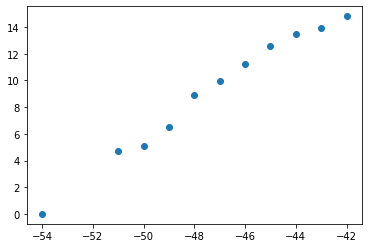

In [13]:
plt.plot([E for E, G in df.items()], [np.log(G) for E, G in df.items()], 'o')
plt.show()

In [14]:
{E: S for E, S in df.items() if E + 3*N//2 <= 6}

{-54: 1, -51: 108, -50: 162, -49: 648, -48: 7236}

In [15]:
def analytical_S(q, L):
    N = L * L
    E0 = - 3 * N // 2
    result = {
        E0: np.log(q),
        E0 + 3: np.log(q) + np.log(N) + np.log(q - 1),
        E0 + 4: np.log(q) + np.log(N) + np.log(q - 1) + np.log(3 / 2),
        E0 + 5: np.log(6 * N * (q - 1) + N * q * (q - 1) * (N - 3)),
        E0 + 6: np.log(6 * N * (q - 1) * (q - 2) * q + N * q * (q - 1) * (N - 3))
    }
    return result

In [16]:
{E + 3*N//2: int(np.exp(S) + 0.5) for E, S in analytical_S(q, L).items()}

{0: 4, 3: 432, 4: 648, 5: 14904, 6: 19440}

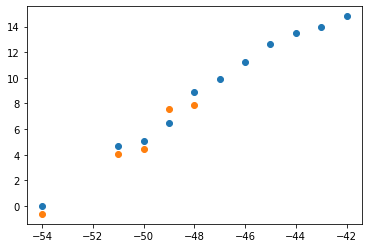

In [17]:
plt.plot([E for E, G in df.items()], [np.log(G) for E, G in df.items()], 'o')
plt.plot([E for E, G in analytical_S(q, L).items()], [G - 2 for E, G in analytical_S(q, L).items()], 'o')
plt.show()

In [86]:
k = 3
d[k] = {}
count = 0
for k1, color1 in itertools.product(range(N), [1]):
    for k2, color2 in itertools.product(range(N), [1]):
        for k3, color3 in itertools.product(range(N), [1]):
            if (k1 == k2 or k2 == k3 or k1 == k3):
                continue
            state = [0 for _ in range(N)]
            state[k1] = color1
            state[k2] = color2
            state[k3] = color3
            E = calc_energy(state, N, L)
            if (set([k1, k2, k3]) == set([0, 1, 7])):
                print(k1, k2, k3, E)
            try:
                d[k][E] += 1
            except: 
                d[k][E] = 1
d[k], count

0 1 7 -49
0 7 1 -49
1 0 7 -49
1 7 0 -49
7 0 1 -49
7 1 0 -49


({-47: 9720, -49: 648, -45: 32472}, 0)

In [92]:
k = 3
d[k] = {}
for k1, color1 in itertools.product(range(N), [1]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1]):
        for k3, color3 in itertools.product(range(k2 + 1, N), [1]):
            state = [0 for _ in range(N)]
            state[k1] = color1
            state[k2] = color2
            state[k3] = color3
            E = calc_energy(state, N, L)
            #if (set([k1, k2, k3]) == set([0, 1, 7])):
            #    print(k1, k2, k3, E)
            if (E == -49):
                print([k1, k2, k3], E)

            try:
                d[k][E] += 1
            except: 
                d[k][E] = 1
d[k]

[0, 1, 6] -49
[0, 1, 7] -49
[0, 1, 30] -49
[0, 1, 31] -49
[0, 6, 11] -49
[0, 6, 12] -49
[0, 6, 30] -49
[0, 24, 30] -49
[0, 30, 35] -49
[1, 7, 8] -49
[1, 7, 13] -49
[1, 7, 31] -49
[1, 25, 31] -49
[1, 31, 32] -49
[2, 3, 8] -49
[2, 3, 9] -49
[2, 3, 32] -49
[2, 3, 33] -49
[2, 7, 8] -49
[2, 8, 14] -49
[2, 8, 32] -49
[2, 26, 32] -49
[2, 31, 32] -49
[3, 9, 10] -49
[3, 9, 15] -49
[3, 9, 33] -49
[3, 27, 33] -49
[3, 33, 34] -49
[4, 5, 10] -49
[4, 5, 11] -49
[4, 5, 34] -49
[4, 5, 35] -49
[4, 9, 10] -49
[4, 10, 16] -49
[4, 10, 34] -49
[4, 28, 34] -49
[4, 33, 34] -49
[5, 6, 11] -49
[5, 11, 17] -49
[5, 11, 35] -49
[5, 29, 35] -49
[5, 30, 35] -49
[6, 11, 12] -49
[6, 11, 17] -49
[6, 12, 13] -49
[6, 12, 18] -49
[7, 8, 13] -49
[7, 8, 14] -49
[7, 12, 13] -49
[7, 13, 19] -49
[8, 14, 15] -49
[8, 14, 20] -49
[9, 10, 15] -49
[9, 10, 16] -49
[9, 14, 15] -49
[9, 15, 21] -49
[10, 16, 17] -49
[10, 16, 22] -49
[11, 16, 17] -49
[11, 17, 23] -49
[12, 13, 18] -49
[12, 13, 19] -49
[12, 18, 23] -49
[12, 18, 24] -49
[1

{-47: 1620, -49: 108, -45: 5412}

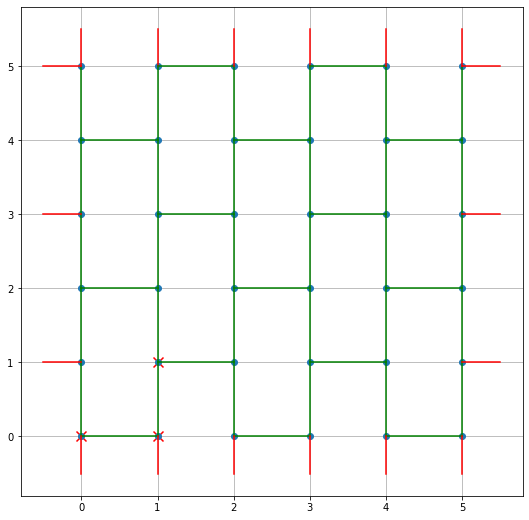

In [93]:
def get_data(L):
    data = []
    N = L * L
    for j in range(N):
        column = j % L
        row = j // L
        down = (j + L) % N
        data.append((j, down))
        if (row + column) % 2 == 0:
            right = (j + 1) % L + L * row
            data.append((j, right))
    return data
def get_coords(i, L):
    return i % L, i // L
def sign(x):
    if x > 0:
        return 1
    else:
        return -1
def plot_line(pair, L):
    i, j = pair
    ix, iy = get_coords(i, L)
    jx, jy = get_coords(j, L)
    if ix in (0, L - 1) and jx in (0, L - 1) and ix != jx:
        dx = ix - jx
        plt.plot([ix, ix+sign(dx)/2], [iy, iy], c='r')
        plt.plot([jx, jx-sign(dx)/2], [jy, jy], c='r')
    elif iy in (0, L - 1) and jy in (0, L - 1) and iy != jy:
        dy = iy - jy
        plt.plot([ix, ix], [iy, iy+sign(dy)/2], c='r')
        plt.plot([jx, jx], [jy, jy-sign(dy)/2], c='r')
    else:
        plt.plot([ix, jx], [iy, jy], c='g')

data = get_data(L)
plt.figure(figsize=(9, 9))
plt.plot([i for i in range(0, L) for j in range(0, L)], [j for i in range(0, L) for j in range(0, L)], 'o')
for pair in data:
    plot_line(pair, L)
points = [0, 1, 7]
plt.scatter([get_coords(i, L)[0] for i in points], [get_coords(i, L)[1] for i in points], marker='x', s=100, c='r')
plt.grid()
plt.show()